# Fermi Seyfert Galaxies Stacking Analysis

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gammapy.catalog import CATALOG_REGISTRY
from gammapy.datasets import FluxPointsDataset, Datasets
from astropy import units as u

## Flux Points from Stacking Analysis

In [2]:
#Getting data from Fermi catalogs
catalog_4fgl = CATALOG_REGISTRY.get_cls("4fgl")()
catalog_3fhl = CATALOG_REGISTRY.get_cls("3fhl")()

source_fermi_4fgl = catalog_4fgl["4FGL J0242.6-0000"]
source_fermi_3fhl = catalog_3fhl["3FHL J0242.7-0002"]

dataset_4fgl = FluxPointsDataset(data=source_fermi_4fgl.flux_points, name="Fermi 4FGL-DR4")
dataset_4fgl.data.to_table(sed_type="dnde", formatted=True)

dataset_3fhl = FluxPointsDataset(data=source_fermi_3fhl.flux_points, name="Fermi 3FHL")
dataset_3fhl.data.to_table(sed_type="dnde", formatted=True)

datasets = Datasets([dataset_4fgl, dataset_3fhl])

In [5]:
# Read the .dat file assuming whitespace-separated values.
df_ul = pd.read_csv('/Users/tharacaba/Desktop/Tesis_2/MASS_Thesis/SED/NGC 1068/NGC1068_MAGIC_UL.dat', delim_whitespace=True, header=0)

# Rename columns for clarity
df_ul.columns = ['energy', 'energy_min', 'energy_max', 'flux_UL']

# Convert columns to numeric
df_ul['energy'] = pd.to_numeric(df_ul['energy'], errors='coerce')
df_ul['energy_min'] = pd.to_numeric(df_ul['energy_min'], errors='coerce')
df_ul['energy_max'] = pd.to_numeric(df_ul['energy_max'], errors='coerce')
df_ul['flux_UL'] = pd.to_numeric(df_ul['flux_UL'], errors='coerce')

# Convert MAGIC energy from GeV to eV (1 GeV = 1e9 eV)
df_ul['energy'] = df_ul['energy'] * 1e9
df_ul['energy_min'] = df_ul['energy_min'] * 1e9
df_ul['energy_max'] = df_ul['energy_max'] * 1e9

# We'll define a small fraction of the flux as the 'error' so that the arrow is visible.
fraction = 0.2  # 20% of the flux, for example

/var/folders/d2/vc9_lbj902b8n1wlkbw8c1mr0000gn/T/ipykernel_40963/1560116150.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_ul = pd.read_csv('/Users/tharacaba/Desktop/Tesis_2/MASS_Thesis/SED/NGC 1068/NGC1068_MAGIC_UL.dat', delim_whitespace=True, header=0)


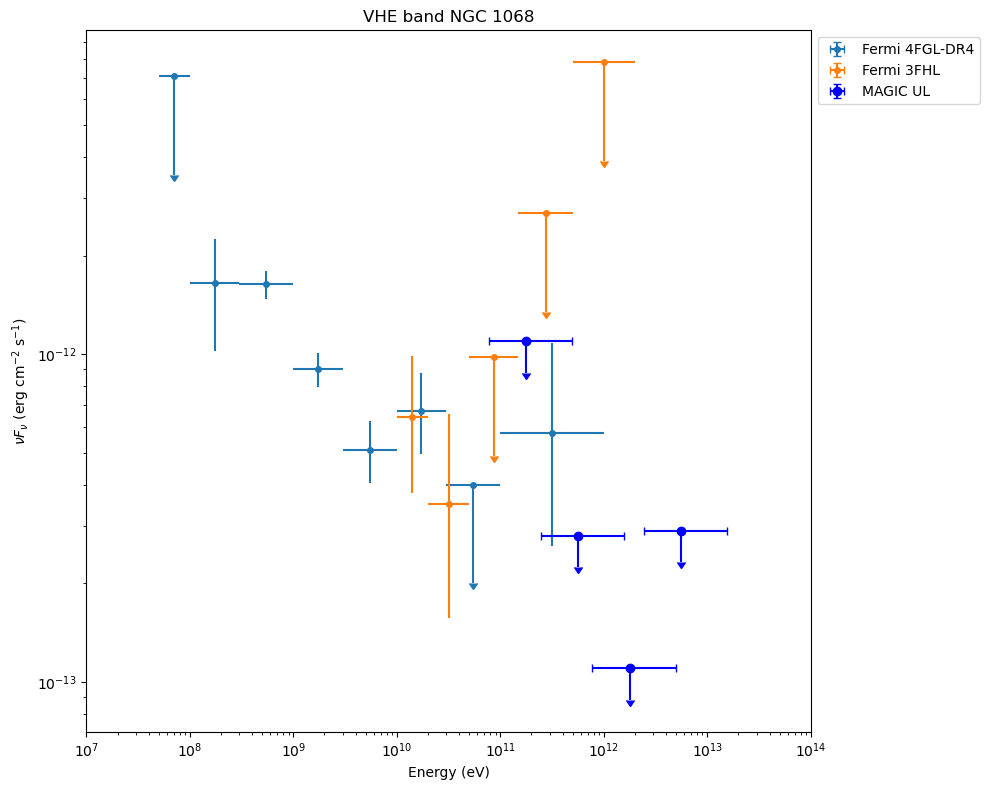

In [6]:
# Only plotting the VHE band

# Create a combined plot
fig, ax = plt.subplots(figsize=(10, 8))
# Set x-axis units to eV so that the Fermi plot (which uses eV) aligns correctly
ax.xaxis.set_units(u.Unit("eV"))

# Plot Fermi data using the same kwargs as in your standalone Fermi plot
kwargs = {"ax": ax, "sed_type": "e2dnde"}
for d in datasets:
    d.data.plot(label=d.name, **kwargs)

# Plot MAGIC upper limits
# Use uplims=True to draw a downward arrow from the data point
plt.errorbar(
    df_ul['energy'],
    df_ul['flux_UL'],
    yerr = fraction * df_ul['flux_UL'],
    xerr=[df_ul['energy_min'], df_ul['energy_max']],
    fmt='o',         # 'o' marker at the flux limit
    uplims=True,     # arrow indicates flux is only bounded from above
    color='blue',
    capsize=3,       # length of the error bar caps
    label='MAGIC UL'
)

# Adjust axis limits to cover the full energy range
energy_bounds = [0.00001, 100] * u.TeV 
ax.set_xlim(energy_bounds)

# Set labels and title
ax.set_xlabel('Energy (eV)')
ax.set_ylabel(r'$\nu F_{\nu}$ (erg cm$^{-2}$ s$^{-1}$)')
ax.set_title('VHE band NGC 1068')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

plt.tight_layout()
plt.show()

In [7]:
# Original data
data = {
    "E_min":   [3.0e2,   7.6e2,   1.9e3,   4.8e3,   1.2e4,   3.1e4,   7.8e4, 2.0e5],
    "E_max":   [7.6e2,   1.9e3,   4.8e3,   1.2e4,   3.1e4,   7.8e4,   2.0e5, 5.0e5],
    "flux": [6.72e-11, 1.66e-11, 0.47e-11, 0.11e-11, 0.05e-11, 0.03e-11, 0.02e-11, 0.01e-11],
    "flag": ["UL", "", "", "", "", "UL", "", "UL"],
    "flux_err": [np.nan, 0.63e-11, 0.18e-11, 0.06e-11, 0.03e-11, np.nan, 0.01e-11, np.nan]
}
df = pd.DataFrame(data)

data2 = {
    "log_flux_erg":   [-13.28472, -13.48418, -13.6375, -13.86247, -13.81698, -13.61862, -13.39976, -13.28407],
    "log_flux_err_erg": [np.nan, 0.1735, 0.17526, 0.26574, 0.30103, np.nan, 0.23856, np.nan]
}
df2 = pd.DataFrame(data2)

# Add columns from df2 to df
df["log_flux_erg"] = df2["log_flux_erg"]
df["log_flux_err_erg"] = df2["log_flux_err_erg"]

# Unlog the flux and its error
df["flux_erg"] = 10 ** df["log_flux_erg"]
df["flux_err_erg"] = 10 ** df["log_flux_err_erg"]

df

,E_min,E_max,flux,flag,flux_err,log_flux_erg,log_flux_err_erg,flux_erg,flux_err_erg
0,300.0,760.0,6.720000e-11,UL,NaN,-13.28472,NaN,5.191346e-14,NaN
1,760.0,1900.0,1.660000e-11,,6.300000e-12,-13.48418,0.17350,3.279593e-14,1.491077
2,1900.0,4800.0,4.700000e-12,,1.800000e-12,-13.63750,0.17526,2.304093e-14,1.497132
3,4800.0,12000.0,1.100000e-12,,6.000000e-13,-13.86247,0.26574,1.372556e-14,1.843911
4,12000.0,31000.0,5.000000e-13,,3.000000e-13,-13.81698,0.30103,1.524123e-14,2.000000
5,31000.0,78000.0,3.000000e-13,UL,NaN,-13.61862,NaN,2.406467e-14,NaN
6,78000.0,200000.0,2.000000e-13,,1.000000e-13,-13.39976,0.23856,3.983272e-14,1.732048
7,200000.0,500000.0,1.000000e-13,UL,NaN,-13.28407,NaN,5.199122e-14,NaN


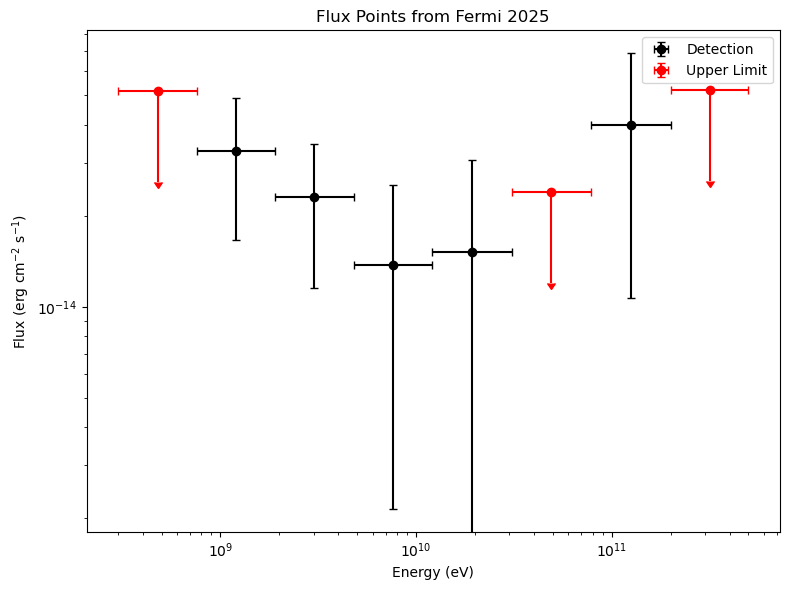

In [8]:
# 1. convert log-flux → linear flux
df["flux_erg"] = 10**df["log_flux_erg"]

# proper *linear* 1-σ uncertainty:
# ΔF = F × (10^{σ_log} – 1)
df["flux_err_erg_lin"] = df["flux_erg"] * (10**df["log_flux_err_erg"] - 1)

# 2. bin centres and half-widths
df["E_center"] = np.sqrt(df["E_min"] * df["E_max"])
df["dE_low"]  = df["E_center"] - df["E_min"]
df["dE_high"] = df["E_max"]    - df["E_center"]

# convert MeV → eV
MeV2eV = 1e6
for col in ["E_min", "E_max", "E_center", "dE_low", "dE_high"]:
    df[col] *= MeV2eV

# split detections / ULs
det  = df[df["flag"] == ""]
uls  = df[df["flag"] == "UL"]

# --- plotting --------------------------------------------------------------- #
plt.figure(figsize=(8,6))

# detections
plt.errorbar(det["E_center"], det["flux_erg"],
             xerr=[det["dE_low"], det["dE_high"]],
             yerr=det["flux_err_erg_lin"],
             fmt="ko", label="Detection", capsize=3)

# upper limits: put the arrow one sigma above the point for visibility
plt.errorbar(uls["E_center"], uls["flux_erg"],
             xerr=[uls["dE_low"], uls["dE_high"]],
             yerr=0.5*uls["flux_erg"],   # short dummy bar
             uplims=True, fmt="ro", label="Upper Limit", capsize=3)

plt.xscale("log"); plt.yscale("log")
plt.xlabel("Energy (eV)")
plt.ylabel("Flux (erg cm$^{-2}$ s$^{-1}$)")
plt.title("Flux Points from Fermi 2025")
plt.legend()
plt.tight_layout()
plt.show()


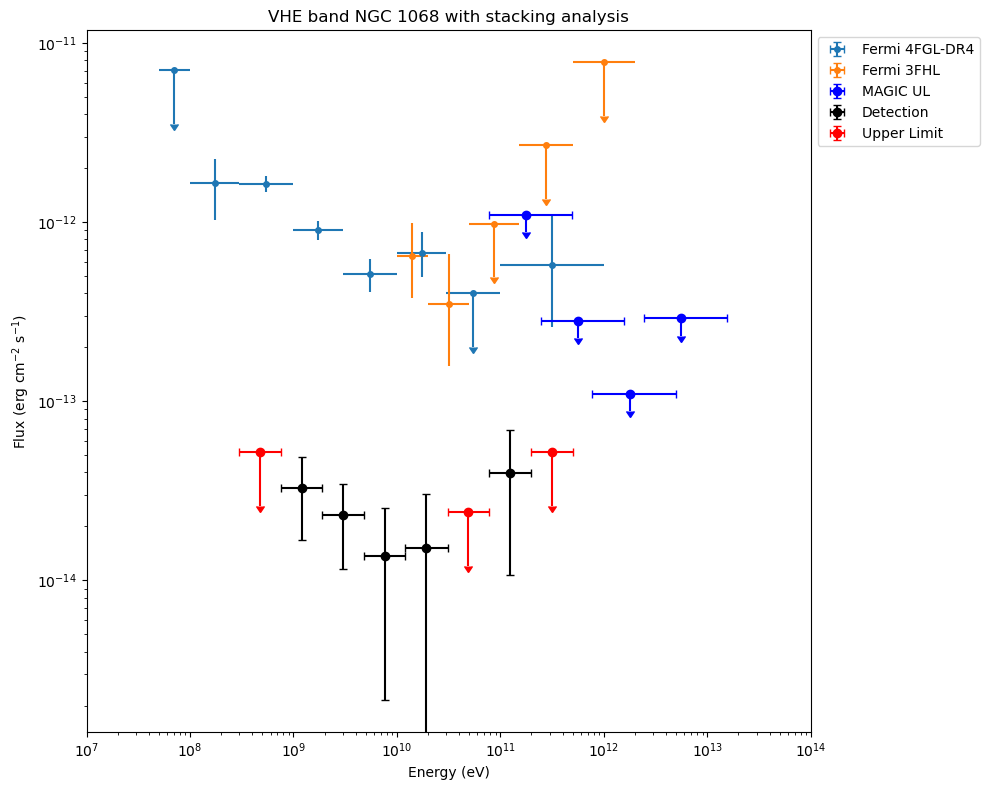

In [9]:
# Create a combined plot
fig, ax = plt.subplots(figsize=(10, 8))
# Set x-axis units to eV so that the Fermi plot (which uses eV) aligns correctly
ax.xaxis.set_units(u.Unit("eV"))

# Plot Fermi data using the same kwargs as in your standalone Fermi plot
kwargs = {"ax": ax, "sed_type": "e2dnde"}
for d in datasets:
    d.data.plot(label=d.name, **kwargs)

# Plot MAGIC upper limits
# Use uplims=True to draw a downward arrow from the data point
plt.errorbar(
    df_ul['energy'],
    df_ul['flux_UL'],
    yerr = fraction * df_ul['flux_UL'],
    xerr=[df_ul['energy_min'], df_ul['energy_max']],
    fmt='o',         # 'o' marker at the flux limit
    uplims=True,     # arrow indicates flux is only bounded from above
    color='blue',
    capsize=3,       # length of the error bar caps
    label='MAGIC UL'
)

# Plot Fermi 2025 data.
# --- plotting --------------------------------------------------------------- #

# detections
plt.errorbar(det["E_center"], det["flux_erg"],
             xerr=[det["dE_low"], det["dE_high"]],
             yerr=det["flux_err_erg_lin"],
             fmt="ko", label="Detection", capsize=3)

# upper limits: put the arrow one sigma above the point for visibility
plt.errorbar(uls["E_center"], uls["flux_erg"],
             xerr=[uls["dE_low"], uls["dE_high"]],
             yerr=0.5*uls["flux_erg"],   # short dummy bar
             uplims=True, fmt="ro", label="Upper Limit", capsize=3)

# Adjust axis limits to cover the full energy range
energy_bounds = [0.00001, 100] * u.TeV 
ax.set_xlim(energy_bounds)

# Set labels and title
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Flux (erg cm$^{-2}$ s$^{-1}$)')
ax.set_title('VHE band NGC 1068 with stacking analysis')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

plt.tight_layout()
plt.show()